[(1.5, 1.3333333333333335), (2.0, 0.6666666666666667), (2.5, 0.0), (3.0, -0.6666666666666665), (3.5, -1.3333333333333335)]


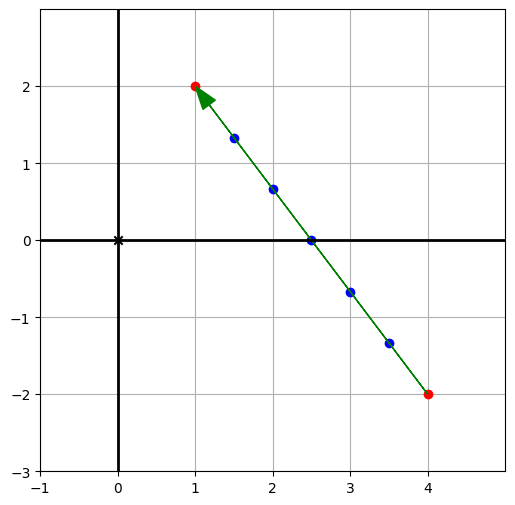

In [1]:
from draw2d import *
from vectors import *

def sample_points(v1, v2, num_points):
    return [add(v1, scale(i/(num_points+1), subtract(v2,v1))) for i in range(1,num_points+1)]

v1 = (1, 2)
v2 = (4, -2)
points = sample_points(v1, v2, 5)
print(points)

draw2d(
    Points2D(v1, v2, color='red'),
    Points2D(*points, color='blue'),
    Arrow2D(v1, v2, color='green')
)

In [2]:
def component(v):
    n = len(v)
    components = []
    for i in range(n):
        c = [0]*n
        c[i] = v[i]
        components.append(tuple(c))
    return components

print(component((1,2,3)))
print(component((1,2,3,4,5)))

[(1, 0, 0), (0, 2, 0), (0, 0, 3)]
[(1, 0, 0, 0, 0), (0, 2, 0, 0, 0), (0, 0, 3, 0, 0), (0, 0, 0, 4, 0), (0, 0, 0, 0, 5)]


In [ ]:
# 练习4.10：再考虑对所有坐标执行二次方运算的向量变换
def square(v):
    return tuple(x**2 for x in v)

def cubic(v):
    return tuple(x**3 for x in v)

print(square((1,2,3)))
print(square((-1,2,-3)))

import teapot
from draw_model import *

# draw_model(polygon_map(square, teapot.load_triangles()))
# draw_model(teapot.load_triangles())
draw_model(polygon_map(cubic, teapot.load_triangles()))